In [ ]:
# hide
from utils import *
setup_chapter()

Using transformers v4.11.3
Using datasets v1.13.0
Using accelerate v0.5.1


## 文本生成

文本生成是自然语言处理中一个重要的研究领域，具有广阔的应用前景。国内外已经有诸如Automated Insights、Narrative Science以及“小南”机器人和“小明”机器人等文本生成系统投入使用。这些系统根据格式化数据或自然语言文本生成新闻、财报或者其他解释性文本。例如，Automated Insights的WordSmith技术已经被美联社等机构使用，帮助美联社报道大学橄榄球赛事、公司财报等新闻。这使得美联社不仅新闻更新速度更快，而且在人力资源不变的情况下扩大了其在公司财报方面报道的覆盖面。

### 任务定义

接受非语言形式的信息作为输入，生成可读的文字表述。数据到文本的生成适用于这个定义，后续研究人员将这个概念拓展为包括了文本到文本的生成、数据到文本的生成以及图像到文本的生成的文本生成技术。

### 任务分类

按照输入数据的区别，可以将文本生成任务大致分为以下三类：
- 1）文本到文本的生成；
- 2）数据到文本的生成；
- 3）图像到文本的生成。

       

 1）文本到文本的生成又可根据不同的任务分为（包括但不限于）：文本摘要、 古诗生成、文本复述等。文本摘要又可以分为抽取式摘要和生成式摘要。
抽取式摘要通常包含信息抽取和规划等主要步骤。近期，在这方面有许多有趣的工作：
- 在为论文自动生成相关工作部分文本的任务上使用主题模型PLSA将句子按照主题进行聚类，使用SVR(Support Vector Regression)计算句子的相似度，最后使用线性规划生成相关工作文本。
- 在基于短语级别为学术论文生成演示文件的研究中采用了四个步骤。首先从论文中抽取名词短语、动词短语作为候选短语， 利用人工设计的特征和基于随机森林的分类器决定短语是否应出现在演示文件中，再训练一个基于随机森林的分类器判断两个短语是否存在一级、二级标题的关系，最后使用贪心策略选择句子构成一个演示文件。Zhang[5]在根据体育赛事直播文字生成赛事报道的任务上，主要采用了Learning to Rank的方法结合人工设计的特征模版对句子进行打分，进而采用行列式点过程(DPP, Determinantal Point Process)进行句子选择。
- 最近ACL 2017上发表了多篇生成式摘要的论文。
- 如See等人提出了解决生成事实性错误文本和重复性文本问题的方法[6]，Zhou等人加入选择门网络(selective gate network)进行摘要生成[7]。
- 古诗生成方面，Zhang等人[8]使用循环神经网络进行生成，Wang等人[9]将古诗生成划分为规划模型和生成模型两部份。
- Zhang等人[10]在Seq2Seq模型的基础上加入记忆模块。文本复述方面，Quirk等人[11]使用机器翻译的方法生成复述文本，Max等人 
- [12]采用基于枢轴(pivot)的复述生成方法，以另一种语言作为中间媒介，将源语言翻译成另一种语言后再翻译为原来的语言。

       

 2）结构化数据生成文本的任务上，Reiter等人[13]将数据到文本的系统分为了信号处理（视输入数据类型可选）、数据分析、文档规划和文本实现四个步骤。Mei等人[14]基于encoder-decoder模型加入了aligner选择重要信息，基于深度学习提出了一个端到端的根据数据生成文本的模型。比如 语义解析 (Text-to-SQL)

       

 3）图像到文本的生成方面也有不同的任务，如image-caption、故事生成、基于图像的问答等。在为图像生成解释性文本（image-caption）的任务上，Vinyals等人[15]使用类似encoder-decoder的模型进行生成。Xu等人[16]则进一步加入Attention机制。Huang等人[17]提出针对图片序列生成故事的任务，并且提供了单张图片的描述性文本、单张图片的故事以及图片序列的故事三个层级的数据集。在第三个数据集上，他们拓展之前的模型并加入一些技巧提供了该任务的一些baseline。并通过对自动化评价指标以及人工评价相关度的衡量，确定使用METEOR作为自动化评价指标。基于图像的问答任务上，Shih等人[18]提出了使用基于Attention机制的模型用VGGnet编码图片，用词向量求均值表示问题，最后经过两层网络生成答案 、Wu等人[19]提出了整合image-caption模型和外部知识库等生成答案。
 
### 文本生成方法
 
 
1 基于语言模型的自然语言生成

        

基于马尔可夫的语言模型在数据驱动的自然语言生成中有着重要的应用。它利用数据和文字间的对齐语料，主要采用两个步骤：内容规划和内容实现为数据生成对应的文本。Oh等人[21]在搭建面向旅行领域的对话系统时，在内容规划部分使用bigram作特征根据近期的对话历史，选取待生成文本中需要出现的属性，内容实现部分使用n-gram语言模型生成对话。Ratnaparkhi等人[22]经过实验对比发现在语言模型上加入依存语法关系有助于改善生成效果。Angeli等人[23]则将文本生成的过程分为三种决策（以生成天气报道为例）：1）宏观的内容选择，如选择温度等方面进行报道。2）微观内容选择，如选择最低温度或者最高温度进行报道。3）模版选择。这三个决策步骤交替进行。每次决策的时候会考虑到历史决策信息，这有助于处理需要考虑长距离的依赖关系的情况，如语义连贯性。

        

2 使用深度学习方法的自然语言生成

        

- 在文本到文本的生成方面，Zhang等人[8]使用RNN进行中文古诗生成，用户输入关键词后首先拓展为短语，并用来生成诗的第一行。接下来的每一行结合当时所有已生成的诗句进行生成。Wang[9]则将古诗生成分为规划模型和生成模型两部份。规划模型部分得到用户的输入，在使用TextRank进行关键词抽取和使用RNN语言模型和基于知识库的方法进行拓展后，获得一个主题词序列，作为写作大纲，每一个主题词在下一个部分生成一行诗。生成模型部分基于encoder-decoder模型，增加一个encoder为主题词获得一个向量表示。

- 另一 个encoder编码已经生成的句子。使用attention-based的模型，decoder综合主题词和已经生成的句子，生成下一句的内容。通过这两个模型，在更好的控制每一行诗的主题的同时保持诗词的流畅性。最近，在ACL 2017上发表了多篇生成式摘要的论文。如See等人[6]为了解决生成一些与事实不符的内容，在标准的基于attention的Seq2Seq模型上结合Pointer Network，使其既可以生成词，也可以从原文中直接把一些词放入生成的文本中。为了解决重复的问题，加入coverage模型。Zhou等人[7]则通过在encoder和decoder之间加入一个选择门网络(selective gate network)作为输入句子的第二层表示，提高编码的有效性，降低decoder的负担。

        

- 在数据到文本的生成方面，Mei[14]提出了encoder-aligner-decoder的端到端模型。主要特点是在标准的encoder和进行了改进的decoder之间加入用于选择将要描述的重要信息的aligner。它对每条记录生成的权重分为两个部分。第一部分是针对每条记录的向量表示单独计算一个权重。 第二部分是在decoder的第t步时，根据decoder已经生成的内容及对应记录的向量表示计算权重。 在两个数据集上取得比较好的效果提升。它的优势在于同步训练内容选择和生成部分且不需要针对任务人工设置特征，普适性较好。

       

- 在图像到文本的生成方面，Vinyals[15]使用Seq2Seq的模型，首先利用深层卷积神经网络DCNN 对图像建模，然后由一个LSTM网络进行解码生成最终的文本。与传统的机器学习方法相比，无需进行图像和文本中词的对齐、调整顺序等步骤。Xu[16]则进一步提出利用Attention机制来加强词语和图像块之间的对齐，在生成文字的时候，模拟人看东西时关注点逐渐转移的过程，以生成更符合人习惯的文本。


推荐资料：

seq2seq结构：[nmt_with_attention](https://www.tensorflow.org/text/tutorials/nmt_with_attention)

[【深度学习和自然语言处理】Seq2seq 中文文本生成](https://kangleizhou.github.io/nlp/2021/05/27/Seq2seq/)

### 模型评价 

No evaluation, no research。如何对生成的文本进行评价也是文本生成研究中重要的一环。Gkatzia[24]总结2005年到2014年间的常用的针对文本生成的评价方法，将其分为内在评价和外在评价方法。其中内在评价关注文本的正确性、流畅度和易理解性。常见的内在评价方法又可分为两类:
- 1）采用BLEU、NIST和ROUGE等进行自动化评价，评估生成文本和参考文本间相似度来衡量生成质量。
- 2）通过人工评价，从有用性等对文本进行打分。外在评价则关注生成文本在实际应用中的可用性。

根据他们的分析，内在评价方法是最为流行的评价方法。2012-2015年间发表的论文超半数使用自动化评价指标进行评价，但由于它需要有大量的对齐语料，且对于对齐语料的质量很敏感，所以在使用自动化评价指标的同时，研究者常常还会同时使用其它的评价方法，如直观且易于操作（与外在评价方法相比）的人工评价生成文本的正确性、流畅性方法。

[基于Seq2Seq的文本生成评价指标解析](https://blog.csdn.net/u012744245/article/details/112371565)



## 基于GPT-2进行文本生成


基于Transformers的语言模型最不可思议的特点之一是它们能够生成与人类所写的文本几乎没有区别的文本。一个著名的例子是OpenAI的GPT-2，它在给出以下提示时:

```
In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.
```
能够生成一篇关于独角兽的新闻：
```
The scientist named the population, after their distinctive horn, Ovid’s Unicorn. These four-horned, silver-white unicorns were previously unknown to science. Now, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved. Dr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow. Pérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez. Pérez and his friends were astonished to see the unicorn herd. These creatures could be seen from the air without having to move too much to see them—they were so close they could touch their horns. While examining these bizarre creatures the scientists discovered that the creatures also spoke some fairly regular English ...
```
这个例子之前是非常有名的，是因为它是在没有任何明确监督的情况下产生的! 通过简单地学习预测数以百万计的网页文本中的下一个词，GPT-2和它更强大的改进版，如GPT-3，能够获得文本学习和模式识别能力，以及能被不同类型的输入提示获得比较不错效果。语言模型在预训练期间有时会接触到一些任务序列，在这些任务中，它们需要仅仅根据上下文来预测下面的标记，如加法、解词和翻译。这使得它们在微调期间或（如果模型足够大）在推理时间有效地转移这些知识。这些任务不是提前选择的，而是在用于训练十亿参数语言模型的巨大语料库中自然出现的。


Transformers生成现实文本的能力导致了多样化的应用，如InferKit、Write With Transformer、AI Dungeon，以及像谷歌的Meena这样的对话代理，它甚至可以讲出老套的笑话，如图5-2所示!




在之前教程里，我们一直专注于通过预训练和监督微调的组合来处理NLP任务。正如我们所看到的，对于像序列或标记分类这样的特定任务，产生预测是相当直接的，比如预测一个文本的情感类别；模型产生一些分数（可以理解为logits），然后我们取最大值来获得预测的类别，或者应用softmax函数来获得每个类别的预测概率。相比之下，将模型的概率输出转换为文本需要一种解码方法，这就引入了一些文本生成所特有的挑战：

- 解码是反复进行的，因此比简单地将输入通过模型的前向传递一次涉及到更多的计算。
- 生成文本的质量和多样性取决于解码方法和相关超参数的选择。

为了理解这个解码过程是如何进行的，让我们先来看看GPT-2是如何进行预训练并随后应用于生成文本的。

像其他自回归或因果语言模型一样，给定一些初始提示或语境序列x = x1, x2, ... xk，GPT-2被预训练来估计文本中出现的文本序列y = y1, y2, ... yt的概率P（y|x）。由于训练数据比较大，来直接估计P(y|x)是不切实际的，所以通常使用概率链规则来将其分解为条件概率的乘积。

![](https://img-blog.csdnimg.cn/f711eb30ddb6485ba46c3962cc1374c3.png)

其中y<t是序列y1, ..., yt-1的文本字符。从这些条件概率中，我们可以推断出：自回归语言建模相当于在一个句子中给定前面的词来预测每个词；这正是前面方程中右边的概率所描述的。请注意，这个预训练目标与BERT的预训练目标完全不同，BERT利用过去和未来的语境来预测一个被掩盖的标记。

现在你可能已经猜到我们如何调整这个下一个标记的预测任务，以生成任意长度的文本序列。如图5-3所示，我们从 "transformers "这样的流程开始，用模型来预测下一个标记。一旦我们确定了下一个标记，我们就把它附加到提示上，然后用新的输入序列来生成另一个标记。重复这个过程，直到我们达到一个特殊的序列结束符号或预先定义的最大长度。

![](https://img-blog.csdnimg.cn/138e76d539424f0182739d45dac53b30.png)

## 文本生成挑战

## 解码方式1：贪婪搜索（Greedy Search）


从模型的连续输出中获得离散标记的最简单的解码方法是贪婪地选择每个时间点上概率最大的标记：

![](https://img-blog.csdnimg.cn/99eaf775813e4013a3533e6b7ac399c9.png)

为了了解贪婪搜索是如何工作的，让我们先用语言建模头加载15亿参数版本的GPT-2：

In [ ]:
# 导入包
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

Downloading:   0%|          | 0.00/689 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.99G [00:00<?, ?B/s]

现在让我们来生成一些文本! 尽管Transformers为GPT-2这样的自回归模型提供了一个generate()函数，加载预训练模型就可以直接进行解码

但我们将自己实现这个解码方法，看看内部具体流程是什么操作。为了方便理解，我们采取图5-3所示的相同的迭代方法：我们将使用 "transformers "作为输入提示，并进行8步的解码。在每个时间步骤中，我们为提示中的最后一个字符计算出模型的对数，并用softmax计算一下，得到一个概率分布。然后，我们挑选出概率最高的下一个符号，将其添加到输入序列中，并再次运行该过程。

下面的代码完成了这项工作，并且还在每个时间段存储了五个最有可能的标记，这样我们就可以直观地看到备选方案：

In [ ]:
import pandas as pd

input_txt = "Transformers are the"
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
iterations = []
n_steps = 8 # 进行8步解码
choices_per_step = 5 # 每一步候选数量

with torch.no_grad():# eval模式
    for _ in range(n_steps):# 每步解码
        iteration = dict()
        iteration["Input"] = tokenizer.decode(input_ids[0]) # 提示文本
        output = model(input_ids=input_ids) # 将提示文本输入到模型进行解码
        # Select logits of the first batch and the last token and apply softmax
        next_token_logits = output.logits[0, -1, :]
        next_token_probs = torch.softmax(next_token_logits, dim=-1)
        sorted_ids = torch.argsort(next_token_probs, dim=-1, descending=True)
        # Store tokens with highest probabilities
        for choice_idx in range(choices_per_step): # 概率最大的五个token
            token_id = sorted_ids[choice_idx]
            token_prob = next_token_probs[token_id].cpu().numpy()
            token_choice = (
                f"{tokenizer.decode(token_id)} ({100 * token_prob:.2f}%)" # 取百分号两位数
            )
            iteration[f"Choice {choice_idx+1}"] = token_choice
        # Append predicted next token to input
        input_ids = torch.cat([input_ids, sorted_ids[None, 0, None]], dim=-1) # 将概率最大的字符拼接到提示文本
        iterations.append(iteration)
        
pd.DataFrame(iterations)

Input           Choice 1  \
0                               Transformers are the       most (8.53%)   
1                          Transformers are the most   popular (16.78%)   
2                  Transformers are the most popular       toy (10.63%)   
3              Transformers are the most popular toy      line (34.38%)   
4         Transformers are the most popular toy line        in (46.28%)   
5      Transformers are the most popular toy line in       the (65.99%)   
6  Transformers are the most popular toy line in the     world (69.26%)   
7  Transformers are the most popular toy line in ...         , (39.73%)   

            Choice 2               Choice 3               Choice 4  \
0       only (4.96%)           best (4.65%)   Transformers (4.37%)   
1   powerful (5.37%)         common (4.96%)         famous (3.72%)   
2       toys (7.23%)   Transformers (6.60%)             of (5.46%)   
3        in (18.20%)            of (11.71%)          brand (6.10%)   
4        of (15.09%)              , (4.94%)             on (4.40%)   
5   history (12.42%)        America (6.91%)          Japan (2.44%)   
6     United (4.55%)        history (4.29%)             US (4.23%)   
7         . (30.64%)            and (9.87%)           with (2.32%)   

              Choice 5  
0     ultimate (2.16%)  
1   successful (3.20%)  
2          and (3.76%)  
3         line (2.69%)  
4         ever (2.72%)  
5        North (1.40%)  
6            U (2.30%)  
7        today (1.74%)

实现贪婪搜索并不难，但我们要使用Transformers内置的generate()函数来探索更复杂的解码方法。为了重现我们的简单例子，让我们 确保采样被关闭（默认情况下是关闭的，除非你加载检查点的模型的具体配置另有规定），并为新生成的标记数量指定max_new_tokens：

In [ ]:
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output = model.generate(input_ids, max_new_tokens=n_steps, do_sample=False)
print(tokenizer.decode(output[0]))

Transformers are the most popular toy line in the world,


现在让我们尝试一些更有趣的东西：我们能重现OpenAI的独角兽故事吗？正如我们之前所做的，我们将用标记器对提示进行编码，并且我们将为max_length指定一个较大的值，以生成一个较长的文本序列：

In [ ]:
max_length = 128
input_txt = """In a shocking finding, scientist discovered \
a herd of unicorns living in a remote, previously unexplored \
valley, in the Andes Mountains. Even more surprising to the \
researchers was the fact that the unicorns spoke perfect English.\n\n
"""
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_greedy = model.generate(input_ids, max_length=max_length, 
                               do_sample=False)
print(tokenizer.decode(output_greedy[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers, from the University of California, Davis, and the University of
Colorado, Boulder, were conducting a study on the Andean cloud forest, which is
home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to
communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able


我们还可以看到贪婪搜索解码的一个主要缺点：它倾向于产生重复的输出序列，这在新闻文章场景中当然是不合适的，新闻讲究言简意赅。这是贪婪搜索算法的一个常见问题，它可能无法给你提供最佳解决方案；在解码的背景下，它们可能会错过整体概率较高的单词序列，只是因为高概率的单词刚好在低概率的单词之前。

幸运的是，我们可以做得更好--让我们研究一种被称为集束搜索（eam search decoding）的解码方法。

## 解码方式2：集束搜索（beam search decoding）

集束搜索不是在每一步解码概率最高的标记，而是记录前b个最有可能的下一个标记，其中b被称为波束或路径个数。下一组集束的选择是考虑现有集束的所有可能的下一个标记的扩展，并选择b个最可能的扩展。这个过程重复进行，直到我们达到最大长度或EOS标记，然后根据对数概率对b个波束进行排序，选择最可能的序列。图5-4中显示了一个束搜索的例子。

![](https://img-blog.csdnimg.cn/505214ee20be48b8a230447c70ef984f.png)

为什么我们要用对数概率而不是概率本身对序列进行评分？计算一个序列的总体概率P（y1，y2，...，yt|x）涉及计算条件概率P（yt|y<t，x）的乘积是一个原因。由于每个条件概率通常是[0，1]范围内的一个小数字，取它们的乘积会导致总的概率很容易出现下溢。这意味着计算机不能再精确地表示计算的结果。例如，假设我们有一个由t = 1024个标记组成的序列，并慷慨地假设每个标记的概率为0.5。这个序列的总体概率是一个极小的数字：

In [ ]:
0.5 ** 1024

5.562684646268003e-309

导致数值不稳定，因为我们遇到了下溢。我们可以通过计算一个相关项，即对数概率来避免这种情况。如果我们将对数应用于联合概率和条件概率，那么在对数的乘积规则的帮助下，我们可以得到：

![](https://img-blog.csdnimg.cn/29cc1add52a7447da6454a4ef23b8eea.png)

In [ ]:
import numpy as np

sum([np.log(0.5)] * 1024)

-709.7827128933695

这是一个我们可以轻松处理的数字，而且这种方法对更小的数字仍然有效。由于我们只想比较相对概率，我们可以直接用对数概率来做。

让我们计算并比较贪婪和束搜索产生的文本的对数概率，看看束搜索是否能提高整体概率。由于变形金刚模型返回的是给定输入标记的下一个标记的未归一化对数，我们首先需要将对数归一化，以便为序列中的每个标记创建整个词汇的概率分布。然后，我们需要只选择序列中存在的标记概率。下面的函数实现了这些步骤。

In [ ]:
import torch.nn.functional as F

def log_probs_from_logits(logits, labels):
    logp = F.log_softmax(logits, dim=-1)
    logp_label = torch.gather(logp, 2, labels.unsqueeze(2)).squeeze(-1)
    return logp_label

这给我们提供了单个标记的对数概率，所以要得到一个序列的总对数概率，我们只需要将每个标记的对数概率相加：

In [ ]:
def sequence_logprob(model, labels, input_len=0):
    with torch.no_grad():
        output = model(labels)
        log_probs = log_probs_from_logits(
            output.logits[:, :-1, :], labels[:, 1:])
        seq_log_prob = torch.sum(log_probs[:, input_len:])
    return seq_log_prob.cpu().numpy()

注意，我们忽略了输入序列的对数概率，因为它们不是由模型生成的。我们还可以看到，将对数和标签对齐是很重要的；因为模型预测了下一个标记，所以我们没有得到第一个标签的对数，我们也不需要最后一个对数，因为我们没有它的地面真相标记。

让我们用这些函数来首先计算OpenAI提示上的贪婪解码器的序列对数概率。

In [ ]:
logp = sequence_logprob(model, output_greedy, input_len=len(input_ids[0]))
print(tokenizer.decode(output_greedy[0]))
print(f"\nlog-prob: {logp:.2f}")

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The researchers, from the University of California, Davis, and the University of
Colorado, Boulder, were conducting a study on the Andean cloud forest, which is
home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to
communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able

log-prob: -87.43


现在让我们把它与用束搜索生成的序列进行比较。要用generate()函数激活束搜索，我们只需要用num_beams参数指定波束的数量。我们选择的波束越多，可能得到的结果就越好；然而，生成过程会变得更慢，因为我们为每个波束生成平行序列：

In [ ]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5, 
                             do_sample=False)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nlog-prob: {logp:.2f}")

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The discovery of the unicorns was made by a team of scientists from the
University of California, Santa Cruz, and the National Geographic Society.


The scientists were conducting a study of the Andes Mountains when they
discovered a herd of unicorns living in a remote, previously unexplored valley,
in the Andes Mountains. Even more surprising to the researchers was the fact
that the unicorns spoke perfect English

log-prob: -55.23


我们可以看到，我们用束搜索得到的对数概率（越高越好）比用简单的贪婪解码得到的要好。然而，我们可以看到，束搜索也受到重复文本的影响。解决这个问题的一个方法是用no_repeat_ngram_size参数施加一个n-gram惩罚，跟踪哪些n-gram已经被看到，并将下一个token的概率设置为零，如果它将产生一个以前看到的n-gram：

output_beam = model.generate(input_ids, max_length=max_length, num_beams=5, 
                             do_sample=False, no_repeat_ngram_size=2)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nlog-prob: {logp:.2f}")

这还不算太糟！我们已经设法停止了重复，而且我们可以看到，尽管产生了较低的分数，但文本仍然是连贯的。带n-gram惩罚的束搜索是一种很好的方法，可以在关注高概率的标记（用束搜索）和减少重复（用n-gram惩罚）之间找到一个平衡点，它通常用于总结或机器翻译等事实正确性很重要的应用中。当事实的正确性不如生成的输出的多样性重要时，例如在开放领域的闲聊或故事生成中，另一种减少重复同时提高多样性的方法是使用抽样。让我们通过研究几种最常见的抽样方法来完成我们对文本生成的探索。

## 解码方式3：温度采样方法（Temperature Sampling Methods）


![](https://img-blog.csdnimg.cn/5deccc9ae5bb483fb87a202f0fcfeb1d.png)

其中|V|表示词汇的cardinality。我们可以通过添加一个温度参数T来轻松控制输出的多样性，该参数在采取softmax之前重新调整对数：

![](https://img-blog.csdnimg.cn/e81939c0e17442c982bd1797530331eb.png)


通过调整T，我们可以控制概率分布的形状。当T≪1时，分布在原点周围变得尖锐，罕见的标记被压制。另一方面，当T≫1时，分布变得平缓，每个令牌的可能性相同。温度对标记概率的影响见图5-5。

当temperature→0，就变成greedy search；当temperature→∞，就变成均匀采样（uniform sampling）。详见论文：The Curious Case of Neural Text Degeneration

![](https://img-blog.csdnimg.cn/0a5cefefd3b047c2abde00c0def309fd.png)


为了看看我们如何利用温度来影响生成的文本，让我们通过在generate()函数中设置温度参数，以T=2为例进行采样（我们将在下一节解释top_k参数的含义）：

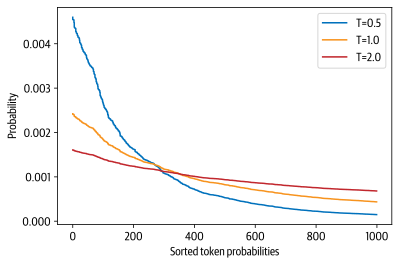

In [ ]:
#hide_input

#id temperature
#alt Token probabilities as a function of temperature
#caption Distribution of randomly generated token probabilities for three selected temperatures
import matplotlib.pyplot as plt
import numpy as np

def softmax(logits, T=1):
    e_x = np.exp(logits / T)
    return e_x / e_x.sum()

logits = np.exp(np.random.random(1000))
sorted_logits = np.sort(logits)[::-1]
x = np.arange(1000)

for T in [0.5, 1.0, 2.0]:
    plt.step(x, softmax(sorted_logits, T), label=f"T={T}")
plt.legend(loc="best")
plt.xlabel("Sorted token probabilities")
plt.ylabel("Probability")
plt.show()

In [ ]:
# hide
torch.manual_seed(42);

为了看看我们如何利用温度来影响生成的文本，让我们通过在generate()函数中设置温度参数，以T=2为例进行采样（我们将在下一节解释top_k参数的含义）：

In [ ]:
output_temp = model.generate(input_ids, max_length=max_length, do_sample=True, 
                             temperature=2.0, top_k=0)
print(tokenizer.decode(output_temp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


While the station aren protagonist receive Pengala nostalgiates tidbitRegarding
Jenny loclonju AgreementCON irrational �rite Continent seaf A jer Turner
Dorbecue WILL Pumpkin mere Thatvernuildagain YoAniamond disse *
Runewitingkusstemprop});b zo coachinginventorymodules deflation press
Vaticanpres Wrestling chargesThingsctureddong Ty physician PET KimBi66 graz Oz
at aff da temporou MD6 radi iter


我们可以清楚地看到，高温产生了大部分的胡言乱语；通过调大罕见词汇出现的概率，我们使模型产生了奇怪的语法和相当多的生造词！让我们看看如果我们把温度降下来会发生什么：

In [ ]:
# hide
torch.manual_seed(42);

In [ ]:
output_temp = model.generate(input_ids, max_length=max_length, do_sample=True, 
                             temperature=0.5, top_k=0)
print(tokenizer.decode(output_temp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The scientists were searching for the source of the mysterious sound, which was
making the animals laugh and cry.


The unicorns were living in a remote valley in the Andes mountains

'When we first heard the noise of the animals, we thought it was a lion or a
tiger,' said Luis Guzman, a researcher from the University of Buenos Aires,
Argentina.


'But when


这明显更有连贯性，甚至还包括了另一所大学因这一发现而被引用的一段话 我们可以从温度中得出的主要经验是，它允许我们控制样本的质量，但在一致性（低温）和多样性（高温）之间总有一个权衡，我们需要根据根据手头的使用情况进行调整。

调整一致性和多样性之间权衡的另一种方法是截断词汇的分布。这使我们能够随着温度自由地调整多样性，但在一个更有限的范围内，排除那些在语境中过于奇怪的词（即低概率词）。有两种主要的方法：top-k和nucleus（或top-p）采样。我们来看看

在大多数研究中, tempreature的选择，往往呈现如下规律：

- 当 temperature 设置为较小或者0的值时， Temperature Sampling 等同于 每次选择最大概率的 Greedy Search。

- 小的temperature 会引发极大的 repetitive 和predictable文本，但是文本内容往往更贴合语料(highly realistic)，基本所有的词都来自与语料库。

- 当temperatures较大时, 生成的文本更具有随机性( random)、趣味性( interesting)，甚至创造性( creative); 甚至有些时候能发现一些新词(misspelled words) 。

- 当 设置高 temperature时，文本局部结构往往会被破坏，大多数词可能会时semi-random strings 的形式。

- 实际应用中，往往experiment with multiple temperature values! 当保持了一定的随机性又能不破坏结构时，往往会得到有意思的生成文本。



## Top-k和核采样（Top-k and Nucleus Sampling）

Top-k和nucleus（top-p）抽样是两种流行的替代方法或使用温度的扩展。在这两种情况下，其基本思想是限制我们在每个时间步长中可以取样的可能标记的数量。为了了解这一点，首先让我们把模型在T=1时的累积概率分布可视化，如图5-6所示。

让我们把这些图分开，因为它们包含了大量的信息。在上面的图中，我们可以看到令牌概率的柱状图。它在10-8左右有一个峰值，在10-4左右有一个较小的峰值，然后是急剧下降，只有少数几个概率在10-2和10-1之间的标记出现。看这张图，我们可以看到，挑选概率最高的字符（10-1处的孤立条）的概率是1/10。

![](https://img-blog.csdnimg.cn/002f753fc3664e1683be7e5bfe4d54c9.png)

在下图中，我们按概率降序排列标记，并计算前10,000个标记的累积总和（GPT-2的词汇中总共有50,257个标记）。弧线代表挑选前面任何一个标记的概率。例如，在概率最高的1,000个标记中，大约有96%的机会挑选任何一个标记。我们看到，该概率迅速上升到90%以上，但在几千个标记之后才饱和，接近100%。该图 显示，有1/100的概率没有选到任何甚至不在前2000名的标记。

虽然这些数字乍看之下可能很小，但它们变得很重要，因为在生成文本时，我们对每个标记取样一次。因此，即使只有1/100或1/1000的机会，如果我们取样数百次，就有很大的机会在某一时刻选到一个不可能的标记，而且在取样时选到这样的标记会严重影响生成文本的质量。出于这个原因，我们通常希望避免这些非常不可能的标记。这就是top-k和top-p采样发挥作用的地方。


In [ ]:
# hide
torch.manual_seed(42);

In [ ]:
# hide
input_txt = """In a shocking finding, scientist discovered \
a herd of unicorns living in a remote, previously unexplored \
valley, in the Andes Mountains. Even more surprising to the \
researchers was the fact that the unicorns spoke perfect English.\n\n
"""
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)

In [ ]:
# hide
import torch.nn.functional as F

with torch.no_grad():
    output = model(input_ids=input_ids)
    next_token_logits = output.logits[:, -1, :]
    probs = F.softmax(next_token_logits, dim=-1).detach().cpu().numpy()

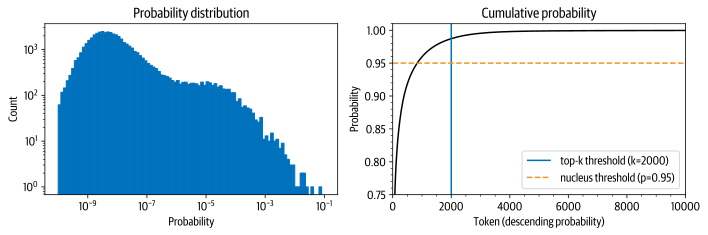

In [ ]:
# hide_input

#id distribution
#alt Probability distribution of next token prediction.
#caption Probability distribution of next token prediction (left) and cumulative distribution of descending token probabilities

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

axes[0].hist(probs[0], bins=np.logspace(-10, -1, 100), color="C0", edgecolor="C0")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Probability distribution")
axes[0].set_xlabel("Probability")
axes[0].set_ylabel("Count")
#axes[0].grid(which="major")

axes[1].plot(np.cumsum(np.sort(probs[0])[::-1]), color="black")
axes[1].set_xlim([0, 10000])
axes[1].set_ylim([0.75, 1.01])
axes[1].set_title("Cumulative probability")
axes[1].set_ylabel("Probability")
axes[1].set_xlabel("Token (descending probability)")
#axes[1].grid(which="major")
axes[1].minorticks_on()
#axes[1].grid(which='minor', linewidth='0.5')
top_k_label = 'top-k threshold (k=2000)'
top_p_label = 'nucleus threshold (p=0.95)'
axes[1].vlines(x=2000, ymin=0, ymax=2, color='C0', label=top_k_label)
axes[1].hlines(y=0.95, xmin=0, xmax=10000, color='C1', label=top_p_label, linestyle='--')
axes[1].legend(loc='lower right')
plt.tight_layout()

In [ ]:
# hide
torch.manual_seed(42);

- top-k抽样

在Top-K Sampling中，将挑选出K个最有可能的下一个单词，并且仅在这K个下一个单词之间重新为它们分配概率。 GPT2就是采用了这种采样方案，这也是其生成故事效果不错的原因之一。

我们将上面示例中两个采样步中使用的单词范围从3个扩展到10个，以更好地说明Top-K采样。

![](https://img-blog.csdnimg.cn/20200408213809284.png)

上述设置K = 6 K=6K=6，将采样最有可能的6个单词，记为V top-K  .在第一步采样中，V top-K   top-K 包含了整体的2/3，第二步采样则包含了几乎全部，但是有效地去除了一些奇奇怪怪的单词。

top-k抽样背后的想法是通过只从概率最高的k个标记中抽样来避免低概率的选择。这就在分布的长尾上设置了一个固定的切口，确保我们只从可能的选择中取样。回到图5-6，top-k抽样相当于定义一条垂直线并从左边的标记中抽样。同样，generate()函数通过top_k参数提供了一个简单的方法来实现这一点:

In [ ]:
output_topk = model.generate(input_ids, max_length=max_length, do_sample=True, 
                             top_k=50)
print(tokenizer.decode(output_topk[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The wild unicorns roam the Andes Mountains in the region of Cajamarca, on the
border with Argentina (Picture: Alamy/Ecole Nationale Supérieure d'Histoire
Naturelle)

The researchers came across about 50 of the animals in the valley. They had
lived in such a remote and isolated area at that location for nearly a thousand
years that


这可以说是我们迄今为止生成的最像人类的文本。但是我们如何选择k呢？k的值是手动选择的，对序列中的每个选择都是一样的，与实际的输出分布无关。序列中的每个选择都是一样的，与实际的输出分布无关。我们可以通过查看一些文本质量指标来找到一个好的k值，我们将在下一章探讨这个问题--但这个固定的截止值可能并不十分令人满意。

另一种方法是使用动态截断。在核抽样或顶抽样中，我们不是选择一个固定的截断值，而是设定一个截断的时间条件。这个条件就是在选择中达到一定的概率质量时。比方说，我们把这个值设定为95%。然后我们按概率降序排列所有标记，并从列表的顶部开始一个接一个地添加标记，直到所选标记的概率之和达到95%。回到图5-6，p的值在概率累积总和图上定义了一条水平线，我们只从该线以下的标记中取样。根据输出分布，这可能只是一个（非常可能的）标记，也可能是一百个（同样可能的）标记。在这一点上，你可能对generate()函数也提供了一个激活top-p抽样的参数而不感到惊讶。让我们来试试吧:

- top-p采样

在Top-p采样中，不是从仅最可能的K个单词中采样，而是从其累积概率超过一个阈值p的最小可能单词集合中进行选择，然后将这组单词重新分配概率。 这样，单词集合的大小（也就是集合中单词的数量）可以根据下一个单词的概率分布动态地增加或减少。 

![](https://img-blog.csdnimg.cn/20200408222745559.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0thaXl1YW5fc2p0dQ==,size_16,color_FFFFFF,t_70)


上图示例设置p = 0.92 p = 0.92p=0.92，定义为V top-p ，所有单词累计概率超过0.92的最小单词子集。 在第一步采样中，包括了9个最有可能的单词，而在第二步采样中，只需选择前3个单词即可超过92％。 其实很简单！ 上述过程可以看成，当下一个单词的可预测性不确定时，保留了较多的单词，例如 P ( w ∣ ′ ′  The  ′ ′ ) )；而当下一个单词看起来比较可预测时，只保留几个单词，例如P,P(w∣" The ", “car”)。


In [ ]:
# hide
torch.manual_seed(42);

In [ ]:
output_topp = model.generate(input_ids, max_length=max_length, do_sample=True, 
                             top_p=0.90)
print(tokenizer.decode(output_topp[0]))

In a shocking finding, scientist discovered a herd of unicorns living in a
remote, previously unexplored valley, in the Andes Mountains. Even more
surprising to the researchers was the fact that the unicorns spoke perfect
English.


The scientists studied the DNA of the animals and came to the conclusion that
the herd are descendants of a prehistoric herd that lived in Argentina about
50,000 years ago.


According to the scientific analysis, the first humans who migrated to South
America migrated into the Andes Mountains from South Africa and Australia, after
the last ice age had ended.


Since their migration, the animals have been adapting to


Top-p采样也产生了一个连贯的故事，而且这次有一个新的转折点，关于从澳大利亚到南美洲的移民。你甚至可以把这两种抽样方法结合起来，以获得两个世界的最佳效果。设置top_k=50和top_p=0.9，相当于从最多50个标记的池子里选择概率质量为90%的标记的规则。

注意事项

当我们使用抽样时，我们也可以应用束搜索。与其贪婪地选择下一批候选标记，我们可以对它们进行抽样，并以同样的方式建立起波束。

## 哪种解码方法是最好的？



不幸的是，没有一个普遍的 "最佳 "解码方法。哪种方法最好，取决于你生成文本的任务的性质。如果你想让你的模型执行一个精确的任务，如进行算术运算或提供一个特定问题的答案，那么你应该降低温度或使用确定性的方法，如贪婪搜索与束搜索相结合，以保证得到最可能的答案。如果你想让模型生成更长的文本，甚至有点创造性，那么你应该改用抽样方法，并提高温度，或者使用top-k和核抽样的混合方法。

## 结论
在这一章中，我们研究了文本生成，这是一项与我们之前遇到的NLU任务截然不同的任务。生成文本需要对每个生成的标记进行至少一次前向传递，如果我们使用束搜索，则需要更多。这使得文本生成对计算的要求很高，人们需要合适的基础设施来大规模地运行文本生成模型。此外，一个好的解码策略，将模型的输出概率转化为离散的标记，可以提高文本质量。找到 最好的解码策略需要进行一些实验和对生成的文本进行主观评价。然而，在实践中，我们不希望仅凭直觉来做这些决定。和其他NLP任务一样，我们应该选择一个能反映我们想要解决的问题的模型性能指标。不出所料，选择的范围很广，我们将在下一章中遇到最常见的选择，在这一章中我们将看看如何训练和评估文本总结的模型。或者，如果你迫不及待地想学习如何从头开始训练一个GPT类型的模型，你可以直接跳到第10章，在那里我们收集一个大型的代码数据集，然后在上面训练一个自回归语言模型。

## 参考资料

- [哈工大SCIR-文本生成概述](https://www.jiqizhixin.com/articles/2017-05-22)
- [语义解析 (Text-to-SQL) 技术研究及应用 上篇](https://segmentfault.com/a/1190000022625823)
- [【NLP笔记】文本生成基础与方案梳理](https://zhuanlan.zhihu.com/p/162035103)
- 《Natural Language Processing with Transformers》：https://www.oreilly.com/library/view/natural-language-processing/9781098103231/

- https://huggingface.co/gpt2-xl
- https://huggingface.co/uer/gpt2-chinese-cluecorpussmall
- 中文GPT2：https://github.com/Morizeyao/GPT2-Chinese

- [基于seq2seq文本生成的解码/采样策略](https://www.cnblogs.com/dangui/p/14690958.html)
- [【学习笔记】浅谈文本生成中的采样方法](https://www.cnblogs.com/miners/p/14950681.html#mainContent)
- [从不同解码策略看机器如何生成文本](https://blog.csdn.net/Kaiyuan_sjtu/article/details/105387819)
- https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/02_how_to_generate.ipynb